In [ ]:
# TODO: Importar la función que carga el dataset iris
from sklearn.datasets import load_iris

# TODO: Cargar el dataset iris
iris = load_iris()

# TODO: Obtener los predictores y el target
X, y = iris.data, iris.target

In [ ]:
# TODO: Dividir los datos en train y test.
# TODO: Tamaño de train: 70%
# TODO: Tamaño de test: 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# TODO: Crear un pipeline con un StandardScaler y el modelo KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [ ]:
# TODO: Crear una rejilla de hiperparámetros con los siguientes valores posible:
# n_neighbors: 3, 5, 1, 9, 11
# weights: uniform, distance
# metric: euclidean, manhattan, minkowski
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# TODO: Crear y entrenar un GridSearchCV con 5 cross-validations
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# TODO: Mostrar por pantalla los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")

Mejores hiperparámetros encontrados: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [ ]:
# TODO: Guardar en una variable el mejor modelo y obtener sus clases predichas
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# TODO: Obtener su accuracy y su classification report
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
neighbor_range = range(1, 16)

train_precisions = []
test_precisions = []

for n_neighbors in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', knn)
    ])
    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_precisions.append(accuracy_score(y_train, y_train_pred))
    test_precisions.append(accuracy_score(y_test, y_test_pred))

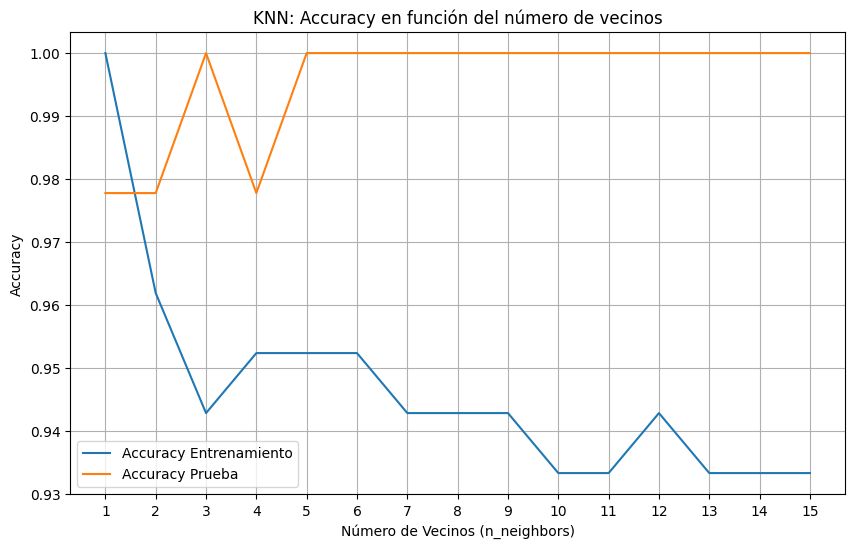

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# plt.plot(neighbor_range, train_precisions, label='Accuracy Entrenamiento', marker='o')
plt.plot(neighbor_range, train_precisions, label='Accuracy Entrenamiento', linestyle="-")
# plt.plot(neighbor_range, test_precisions, label='Accuracy Prueba', marker='s')
plt.plot(neighbor_range, test_precisions, label='Accuracy Prueba', linestyle="-")
plt.title('KNN: Accuracy en función del número de vecinos')
plt.xlabel('Número de Vecinos (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(neighbor_range)
plt.legend()
plt.grid(True)
plt.show()